In [421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [422]:
training = pd.read_csv('../data/North_Carolina/train_test_split/training.csv')

In [423]:
training

,Unnamed: 0,County,EXAM_COUNT,EXAMS_3_OR_ABOVE,PERCENT_3_OR_ABOVE,Year,lat,lng,population,per_capita_income,...,closest_five_avg_enrollment_r1r2,closest_five_avg_enrollment_public,closest_five_avg_enrollment_private_nfp,closest_five_avg_enrollment_landgrnt,closest_five_avg_enrollment_stem,closest_five_avg_dormrooms_r1r2,closest_five_avg_dormrooms_public,closest_five_avg_dormrooms_private_nfp,closest_five_avg_dormrooms_landgrant,closest_five_avg_dormrooms_stem
0,165,Perquimans,13.0,10,76.9230769,2019,36.2059,-76.4411,12974.0,43290.0,...,28590.8,1823.8,3080.8,13526.2,20770.6,6428.8,316.6,557.4,4349.0,4363.4
1,91,Wayne,296.0,123,41.5540541,2018,35.3640,-78.0040,118048.0,39381.0,...,28576.2,3539.8,2403.6,20040.2,28576.2,7345.4,0.0,648.0,6174.4,7345.4
2,155,Mitchell,42.0,21,50,2019,36.0133,-82.1636,14926.0,37310.0,...,24181.8,8358.2,927.0,31226.8,24181.8,5617.4,1814.2,542.6,8084.4,5617.4
3,236,Henderson,565.0,375,66.371681416,2020,35.3363,-82.4800,116541.0,48378.0,...,30916.8,4962.4,1686.8,24107.2,30916.8,6860.6,332.2,1162.6,6481.0,6860.6
4,118,Columbus,120.0,19,15.8333333,2019,34.2657,-78.6550,51546.0,36074.0,...,28576.2,4031.0,718.0,20040.2,28576.2,7345.4,842.2,360.4,6174.4,7345.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,204,Cabarrus,1637.0,1068,65.241295052,2020,35.3868,-80.5519,227214.0,49313.0,...,22496.4,15354.6,872.0,24885.2,22496.4,6242.6,1207.8,524.6,6909.0,6242.6
379,213,Cleveland,528.0,296,56.060606061,2020,35.3341,-81.5555,99799.0,40777.0,...,25475.8,4846.0,2406.8,24107.2,25475.8,5874.8,0.0,835.4,6481.0,5874.8
380,472,Washington,NaN,NaN,NaN,2022,35.8225,-76.5775,10828.0,45405.0,...,28590.8,1879.4,850.8,13526.2,22352.4,6428.8,316.6,520.4,4349.0,5203.2
381,138,Harnett,339.0,134,39.5280236,2019,35.3689,-78.8693,133194.0,36523.0,...,25378.6,21019.4,1927.4,20040.2,25378.6,7509.2,2406.6,595.2,6174.4,7509.2


In [424]:
columns = training.columns[1:]

In [425]:
columns

Index(['County', 'EXAM_COUNT', 'EXAMS_3_OR_ABOVE', 'PERCENT_3_OR_ABOVE',
       'Year', 'lat', 'lng', 'population', 'per_capita_income',
       'closest_five_r1r2_avg', 'closest_five_public_avg',
       'closest_five_private_notprofit_avg', 'closest_five_landgrnt_avg',
       'closest_five_stem_avg', 'closest_five_avg_enrollment_r1r2',
       'closest_five_avg_enrollment_public',
       'closest_five_avg_enrollment_private_nfp',
       'closest_five_avg_enrollment_landgrnt',
       'closest_five_avg_enrollment_stem', 'closest_five_avg_dormrooms_r1r2',
       'closest_five_avg_dormrooms_public',
       'closest_five_avg_dormrooms_private_nfp',
       'closest_five_avg_dormrooms_landgrant',
       'closest_five_avg_dormrooms_stem'],
      dtype='object')

In [426]:
training = training[columns]

In [427]:
features = list(training.columns[7:])
features

['population',
 'per_capita_income',
 'closest_five_r1r2_avg',
 'closest_five_public_avg',
 'closest_five_private_notprofit_avg',
 'closest_five_landgrnt_avg',
 'closest_five_stem_avg',
 'closest_five_avg_enrollment_r1r2',
 'closest_five_avg_enrollment_public',
 'closest_five_avg_enrollment_private_nfp',
 'closest_five_avg_enrollment_landgrnt',
 'closest_five_avg_enrollment_stem',
 'closest_five_avg_dormrooms_r1r2',
 'closest_five_avg_dormrooms_public',
 'closest_five_avg_dormrooms_private_nfp',
 'closest_five_avg_dormrooms_landgrant',
 'closest_five_avg_dormrooms_stem']

In [433]:
from sklearn.model_selection import train_test_split
train, validation = train_test_split(training, test_size = 0.2, random_state = 226)

### statistical analysis with statsmodels

In [434]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [436]:
x_train = training.drop(['County','EXAM_COUNT','EXAMS_3_OR_ABOVE','PERCENT_3_OR_ABOVE','Year','lat','lng'],axis=1)
y_train = training[['PERCENT_3_OR_ABOVE']]
X_train = sm.add_constant(x_train)
unimetric_train = X_train.drop(['population','per_capita_income'],axis=1)
X_train

,const,population,per_capita_income,closest_five_r1r2_avg,closest_five_public_avg,closest_five_private_notprofit_avg,closest_five_landgrnt_avg,closest_five_stem_avg,closest_five_avg_enrollment_r1r2,closest_five_avg_enrollment_public,closest_five_avg_enrollment_private_nfp,closest_five_avg_enrollment_landgrnt,closest_five_avg_enrollment_stem,closest_five_avg_dormrooms_r1r2,closest_five_avg_dormrooms_public,closest_five_avg_dormrooms_private_nfp,closest_five_avg_dormrooms_landgrant,closest_five_avg_dormrooms_stem
0,1.0,12974.0,43290.0,137.046558,48.012134,57.740351,238.571107,110.317666,28590.8,1823.8,3080.8,13526.2,20770.6,6428.8,316.6,557.4,4349.0,4363.4
1,1.0,118048.0,39381.0,98.040195,34.068629,49.812230,220.731530,98.040195,28576.2,3539.8,2403.6,20040.2,28576.2,7345.4,0.0,648.0,6174.4,7345.4
2,1.0,14926.0,37310.0,135.878880,39.779031,38.358682,199.463716,135.878880,24181.8,8358.2,927.0,31226.8,24181.8,5617.4,1814.2,542.6,8084.4,5617.4
3,1.0,116541.0,48378.0,134.033500,23.010380,34.220267,183.076750,134.033500,30916.8,4962.4,1686.8,24107.2,30916.8,6860.6,332.2,1162.6,6481.0,6860.6
4,1.0,51546.0,36074.0,162.083794,44.127808,97.838009,265.551675,162.083794,28576.2,4031.0,718.0,20040.2,28576.2,7345.4,842.2,360.4,6174.4,7345.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,1.0,227214.0,49313.0,91.741941,29.883256,24.596159,183.714823,91.741941,22496.4,15354.6,872.0,24885.2,22496.4,6242.6,1207.8,524.6,6909.0,6242.6
379,1.0,99799.0,40777.0,129.024685,33.206873,39.224774,197.321227,129.024685,25475.8,4846.0,2406.8,24107.2,25475.8,5874.8,0.0,835.4,6481.0,5874.8
380,1.0,10828.0,45405.0,150.783757,57.572774,95.126658,255.982102,132.982444,28590.8,1879.4,850.8,13526.2,22352.4,6428.8,316.6,520.4,4349.0,5203.2
381,1.0,133194.0,36523.0,81.968651,35.631862,26.026482,186.518615,81.968651,25378.6,21019.4,1927.4,20040.2,25378.6,7509.2,2406.6,595.2,6174.4,7509.2


In [437]:
y_train = y_train.apply(pd.to_numeric, errors='coerce')
X_train = X_train.apply(pd.to_numeric, errors='coerce')
unimetric_train = X_train.apply(pd.to_numeric, errors='coerce')

In [438]:
print(unimetric_train.isna().sum())

const                                      0
population                                 6
per_capita_income                          6
closest_five_r1r2_avg                      6
closest_five_public_avg                    6
closest_five_private_notprofit_avg         6
closest_five_landgrnt_avg                  6
closest_five_stem_avg                      6
closest_five_avg_enrollment_r1r2           6
closest_five_avg_enrollment_public         6
closest_five_avg_enrollment_private_nfp    6
closest_five_avg_enrollment_landgrnt       6
closest_five_avg_enrollment_stem           6
closest_five_avg_dormrooms_r1r2            6
closest_five_avg_dormrooms_public          6
closest_five_avg_dormrooms_private_nfp     6
closest_five_avg_dormrooms_landgrant       6
closest_five_avg_dormrooms_stem            6
dtype: int64


In [439]:
print(np.isinf(unimetric_train).sum())

const                                      0
population                                 0
per_capita_income                          0
closest_five_r1r2_avg                      0
closest_five_public_avg                    0
closest_five_private_notprofit_avg         0
closest_five_landgrnt_avg                  0
closest_five_stem_avg                      0
closest_five_avg_enrollment_r1r2           0
closest_five_avg_enrollment_public         0
closest_five_avg_enrollment_private_nfp    0
closest_five_avg_enrollment_landgrnt       0
closest_five_avg_enrollment_stem           0
closest_five_avg_dormrooms_r1r2            0
closest_five_avg_dormrooms_public          0
closest_five_avg_dormrooms_private_nfp     0
closest_five_avg_dormrooms_landgrant       0
closest_five_avg_dormrooms_stem            0
dtype: int64


In [440]:
y_train = y_train.fillna(0)  # or use another strategy like mean, median, etc.
X_train = X_train.fillna(0)  # or use another strategy like mean, median, etc.
unimetric_train = unimetric_train.fillna(0)  # or use another strategy like mean, median, etc.

In [441]:
training['PERCENT_3_OR_ABOVE'] = pd.to_numeric(training['PERCENT_3_OR_ABOVE'], errors='coerce')

C:\Users\amahapatra\AppData\Local\Temp\ipykernel_39736\66272972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['PERCENT_3_OR_ABOVE'] = pd.to_numeric(training['PERCENT_3_OR_ABOVE'], errors='coerce')


In [442]:
nonuni_model = smf.ols('PERCENT_3_OR_ABOVE ~ per_capita_income + population', data=training).fit()

In [443]:
unidistance_model = smf.ols('PERCENT_3_OR_ABOVE ~ closest_five_r1r2_avg + closest_five_public_avg + closest_five_private_notprofit_avg + closest_five_landgrnt_avg + closest_five_stem_avg', data = training).fit()

In [444]:

full_model = sm.OLS(y_train,X_train).fit()
unimetric_model = sm.OLS(y_train,unimetric_train).fit()
nonuni_model = smf.ols('PERCENT_3_OR_ABOVE ~ per_capita_income + population', data=training).fit()
unidistance_model = smf.ols('PERCENT_3_OR_ABOVE ~ closest_five_r1r2_avg + closest_five_public_avg + closest_five_private_notprofit_avg + closest_five_landgrnt_avg + closest_five_stem_avg', data = training).fit()
pci_model=smf.ols('PERCENT_3_OR_ABOVE ~ per_capita_income', data =training).fit()

In [445]:
f_test_nonuni = full_model.compare_f_test(nonuni_model)
f_test_unimetric = full_model.compare_f_test(unimetric_model)
f_test_unidistance = unimetric_model.compare_f_test(unidistance_model)
print("p-value of full compared to non-university metric model:", f_test_nonuni[1])
print("p-value of full compared to university metric model:", f_test_unimetric[1])
print("p-value of university metric compared to university distance model:", f_test_unidistance[1])

p-value of full compared to non-university metric model: nan
p-value of full compared to university metric model: nan
p-value of university metric compared to university distance model: nan


C:\Users\amahapatra\.conda\envs\am-env\Lib\site-packages\statsmodels\regression\linear_model.py:2284: RuntimeWarning: invalid value encountered in scalar divide
  f_value = (ssr_restr - ssr_full) / df_diff / ssr_full * df_full


In [446]:
print(y_train.dtypes)
print(X_train.dtypes)

PERCENT_3_OR_ABOVE    float64
dtype: object
const                                      float64
population                                 float64
per_capita_income                          float64
closest_five_r1r2_avg                      float64
closest_five_public_avg                    float64
closest_five_private_notprofit_avg         float64
closest_five_landgrnt_avg                  float64
closest_five_stem_avg                      float64
closest_five_avg_enrollment_r1r2           float64
closest_five_avg_enrollment_public         float64
closest_five_avg_enrollment_private_nfp    float64
closest_five_avg_enrollment_landgrnt       float64
closest_five_avg_enrollment_stem           float64
closest_five_avg_dormrooms_r1r2            float64
closest_five_avg_dormrooms_public          float64
closest_five_avg_dormrooms_private_nfp     float64
closest_five_avg_dormrooms_landgrant       float64
closest_five_avg_dormrooms_stem            float64
dtype: object


In [447]:
print(y_train.shape)
print(X_train.shape)

(383, 1)
(383, 18)


In [448]:
full_model = sm.OLS(y_train, X_train).fit()

### models with sklearn

In [449]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [450]:
uni_features = list(training.columns[10:])
nonuni_features = list(training.columns[8:10])
features_wo_dormrooms = list(training.columns[8:-5])
coordinates = ['Latitude','Longitude']
features_wo_dormrooms

['per_capita_income',
 'closest_five_r1r2_avg',
 'closest_five_public_avg',
 'closest_five_private_notprofit_avg',
 'closest_five_landgrnt_avg',
 'closest_five_stem_avg',
 'closest_five_avg_enrollment_r1r2',
 'closest_five_avg_enrollment_public',
 'closest_five_avg_enrollment_private_nfp',
 'closest_five_avg_enrollment_landgrnt',
 'closest_five_avg_enrollment_stem']

In [451]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can also use 'median', 'most_frequent', or 'constant'
train[features] = imputer.fit_transform(train[features])

In [452]:
# Replace NaN values with zero
train = train.fillna(0)
# Replace '*' with zero in the entire DataFrame
train = train.replace('*', 0)

In [453]:
fullmodel = LinearRegression()
fullmodel.fit(train[features],train['PERCENT_3_OR_ABOVE'])

LinearRegression()

In [454]:
unimodel = LinearRegression()
unimodel.fit(train[uni_features],train['PERCENT_3_OR_ABOVE'])

LinearRegression()

In [455]:

nonunimodel = LinearRegression()
nonunimodel.fit(train[nonuni_features],train['PERCENT_3_OR_ABOVE'])

LinearRegression()

In [456]:
wodormrooms_model = LinearRegression()
wodormrooms_model.fit(train[features_wo_dormrooms],train['PERCENT_3_OR_ABOVE'])

LinearRegression()

In [457]:
fullmodel.intercept_

np.float64(-34.96602351690543)

In [458]:
fullmodel.coef_

array([-1.88629945e-05,  1.05921090e-03, -1.15407082e+00, -1.28257507e-01,
       -3.64357659e-01,  5.47277266e-01,  9.40064029e-01,  1.90368347e-03,
        1.45363983e-04, -2.51454252e-04,  6.29712061e-03, -1.56567763e-03,
       -1.37988398e-02,  2.10672102e-03,  6.81633615e-03, -2.56662595e-02,
        1.00567149e-02])

In [459]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

In [460]:
# Replace '*' with zero in the entire DataFrame
validation = validation.replace('*', 0)
# Replace NaN values with zero
validation = validation.fillna(0)

In [461]:

print(f"full model rmse:",root_mean_squared_error(fullmodel.predict(validation[features]),validation['PERCENT_3_OR_ABOVE']))
print(f"full model R-squared score:",fullmodel.score(validation[features],validation['PERCENT_3_OR_ABOVE']))

full model rmse: 22.79955796214231
full model R-squared score: 0.016880712039630263


In [462]:
print(f"uni model rmse:",root_mean_squared_error(unimodel.predict(validation[uni_features]),validation['PERCENT_3_OR_ABOVE']))
print(f"uni model R-squared score:",unimodel.score(validation[uni_features],validation['PERCENT_3_OR_ABOVE']))

uni model rmse: 22.40642423013831
uni model R-squared score: 0.050492342606082596


In [463]:
print(f"non uni model rmse:",root_mean_squared_error(nonunimodel.predict(validation[nonuni_features]),validation['PERCENT_3_OR_ABOVE']))
print(f"non uni model R-squared score:",nonunimodel.score(validation[nonuni_features],validation['PERCENT_3_OR_ABOVE']))

non uni model rmse: 23.178168775828688
non uni model R-squared score: -0.016041868698811745


In [464]:
print(f"w/o dormrooms model rmse:",root_mean_squared_error(wodormrooms_model.predict(validation[features_wo_dormrooms]),validation['PERCENT_3_OR_ABOVE']))
print(f"w/o dormrooms model R-squared score:",wodormrooms_model.score(validation[features_wo_dormrooms],validation['PERCENT_3_OR_ABOVE']))

w/o dormrooms model rmse: 24.493120647536756
w/o dormrooms model R-squared score: -0.1345969354210279


### 5-Fold cross-validation for the four models

In [465]:
## import KFold and kNeighborsRegressor here
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor

In [466]:
num_splits = 5
num_models = 5
kfold = KFold(num_splits,
              random_state = 226,
              shuffle=True)
## This array will hold the mse for each model and split
rmses = np.zeros((num_models, num_splits))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(training):
    ## cv training set
    northcarolina_train = training.iloc[train_index]

    # Replace '*' with zero in the entire DataFrame
    northcarolina_train = northcarolina_train.replace('*', 0)
    # Replace NaN values with zero
    northcarolina_train = northcarolina_train.fillna(0)
    
    ## cv holdout set
    northcarolina_holdout = training.iloc[test_index]

    # Replace '*' with zero in the entire DataFrame
    northcarolina_holdout = northcarolina_holdout.replace('*', 0)
    # Replace NaN values with zero
    northcarolina_holdout = northcarolina_holdout.fillna(0)
    
    ## "Fit" and get ho mse for the "take the mean and call it a day" model
    baseline_pred = northcarolina_train['PERCENT_3_OR_ABOVE'].mean()*np.ones(len(northcarolina_holdout))
    
    rmses[0, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], baseline_pred)

    ## Fit and get ho mse for full model
    full_lr = LinearRegression()
    
    full_lr.fit(northcarolina_train[features],northcarolina_train['PERCENT_3_OR_ABOVE'])
    
    rmses[1, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], full_lr.predict(northcarolina_holdout[features]))

    ## Fit and get ho mse for nonuni model
    nonuni_lr = LinearRegression()
    
    nonuni_lr.fit(northcarolina_train[nonuni_features],northcarolina_train['PERCENT_3_OR_ABOVE'])
    
    rmses[2, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], nonuni_lr.predict(northcarolina_holdout[nonuni_features]))

    ## Fit and get ho mse for uni model
    uni_lr = LinearRegression()

    uni_lr.fit(northcarolina_train[uni_features],northcarolina_train['PERCENT_3_OR_ABOVE'])
    
    rmses[3, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], uni_lr.predict(northcarolina_holdout[uni_features]))

    ## Fit and get ho mse for no dorm rooms model
    nodorm_lr = LinearRegression()

    nodorm_lr.fit(northcarolina_train[features_wo_dormrooms],northcarolina_train['PERCENT_3_OR_ABOVE'])

    rmses[4, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], nodorm_lr.predict(northcarolina_holdout[features_wo_dormrooms]))
    i=i+1

In [467]:
## Find the avg cv mse for each model here
print(f"Baseline Avg. CV RMSE: {np.mean(rmses[0,:])} and STD: {np.std(rmses[0,:])}")
print(f"fullmodel Avg. CV RMSE: {np.mean(rmses[1,:])} and STD: {np.std(rmses[1,:])}")
print(f"PCA model Avg. CV RMSE: {np.mean(rmses[2,:])} and STD: {np.std(rmses[2,:])}")
print(f"Ridge model Avg. CV RMSE: {np.mean(rmses[3,:])} and STD: {np.std(rmses[3,:])}")

Baseline Avg. CV RMSE: 22.98290101042038 and STD: 0.8708099752892302
fullmodel Avg. CV RMSE: 19.118994095729153 and STD: 0.7620770023292722
PCA model Avg. CV RMSE: 21.882644687783053 and STD: 0.8477303781970894
Ridge model Avg. CV RMSE: 20.193072433466128 and STD: 1.5583583645862518


### Full model performs clearly the best. The "no dorm rooms" model is the second best, though uni model is not far behind. While nonuni model lags behind, the difference is still not that big.

### PCA

In [468]:
# Replace '*' with zero in the entire DataFrame
training = training.replace('*', 0)
# Replace NaN values with zero
training = training.fillna(0)

In [469]:
scaler = StandardScaler()
training_scaled = scaler.fit_transform(training[features])
training_scaled.shape

(383, 17)

In [470]:
pca = PCA(0.95)
training_pca = pca.fit_transform(training_scaled)

In [471]:
training_pca.shape

(383, 9)

In [472]:
pca.explained_variance_ratio_

array([0.31767029, 0.25698724, 0.11075924, 0.0937842 , 0.07113071,
       0.05137281, 0.02648918, 0.02138639, 0.01647183])

### Comparing PCA model and Ridge model and the full model

In [473]:
pca_pipe = Pipeline([('scale', StandardScaler()), ('pca', PCA(0.95)), ('reg', LinearRegression())])
ridge_pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])

In [474]:
pca_pipe.fit(train[features],train['PERCENT_3_OR_ABOVE'])
ridge_pipe.fit(train[features],train['PERCENT_3_OR_ABOVE'])

Pipeline(steps=[('scale', StandardScaler()), ('ridge', Ridge())])

In [475]:
print(f"pca(0.95) model rmse:",root_mean_squared_error(pca_pipe.predict(validation[features]),validation['PERCENT_3_OR_ABOVE']))
print(f"pca(0.95) model R-squared score:",pca_pipe.score(validation[features],validation['PERCENT_3_OR_ABOVE']))

pca(0.95) model rmse: 23.449363459477162
pca(0.95) model R-squared score: -0.03995723104432791


### Let's compare full model, ridge model and PCA model with 5-fold cross validation.

In [476]:
num_splits = 5
num_models = 4
kfold = KFold(num_splits,
              random_state = 226,
              shuffle=True)
## This array will hold the rmse for each model and split
rmses = np.zeros((num_models, num_splits))
rsquared = np.zeros((num_models, num_splits))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(training):
    ## cv training set
    northcarolina_train = training.iloc[train_index]
    
    ## cv holdout set
    northcarolina_holdout = training.iloc[test_index]
    
    ## "Fit" and get ho mse for the baseline model
    baseline_pred = northcarolina_train['PERCENT_3_OR_ABOVE'].mean()*np.ones(len(northcarolina_holdout))
    
    rmses[0, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], baseline_pred)
    rsquared[0, i] = r2_score(northcarolina_holdout['PERCENT_3_OR_ABOVE'], baseline_pred)
    
    ## Fit and get ho mse for full model
    full_lr = LinearRegression()
    
    full_lr.fit(northcarolina_train[features],northcarolina_train['PERCENT_3_OR_ABOVE'])
    
    rmses[1, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], full_lr.predict(northcarolina_holdout[features]))
    rsquared[1, i] = full_lr.score(northcarolina_holdout[features],northcarolina_holdout['PERCENT_3_OR_ABOVE'])
    
    ## Fit and get ho mse for PCA model
    pca_pipe = Pipeline([('scale', StandardScaler()), ('pca', PCA(0.95)), ('reg', LinearRegression())])
    
    pca_pipe.fit(northcarolina_train[features],northcarolina_train['PERCENT_3_OR_ABOVE'])
    
    rmses[2, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], pca_pipe.predict(northcarolina_holdout[features]))
    rsquared[2, i] = pca_pipe.score(northcarolina_holdout[features],northcarolina_holdout['PERCENT_3_OR_ABOVE'])
    
    ## Fit and get ho mse for Ridge model
    ridge_pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])

    ridge_pipe.fit(northcarolina_train[features],northcarolina_train['PERCENT_3_OR_ABOVE'])
    
    rmses[3, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], ridge_pipe.predict(northcarolina_holdout[features]))
    rsquared[3, i] = ridge_pipe.score(northcarolina_holdout[features],northcarolina_holdout['PERCENT_3_OR_ABOVE'])

    i = i+1

In [477]:
## Find the avg cv mse for each model here
print(f"Baseline Avg. CV RMSE: {np.mean(rmses[0,:])} and STD: {np.std(rmses[0,:])}")
print(f"fullmodel Avg. CV RMSE: {np.mean(rmses[1,:])} and STD: {np.std(rmses[1,:])}")
print(f"PCA model Avg. CV RMSE: {np.mean(rmses[2,:])} and STD: {np.std(rmses[2,:])}")
print(f"Ridge model Avg. CV RMSE: {np.mean(rmses[3,:])} and STD: {np.std(rmses[3,:])}")

Baseline Avg. CV RMSE: 22.98290101042038 and STD: 0.8708099752892302
fullmodel Avg. CV RMSE: 19.118994095729153 and STD: 0.7620770023292722
PCA model Avg. CV RMSE: 20.722814600777582 and STD: 0.817048121346516
Ridge model Avg. CV RMSE: 19.099833364611648 and STD: 0.8978790109621683


In [478]:
## Find the avg cv R-squared score for each model here
print(f"Baseline Avg. CV score: {np.mean(rsquared[0,:])} and STD: {np.std(rsquared[0,:])}")
print(f"fullmodel Avg. CV score: {np.mean(rsquared[1,:])} and STD: {np.std(rsquared[1,:])}")
print(f"PCA model Avg. CV score: {np.mean(rsquared[2,:])} and STD: {np.std(rsquared[2,:])}")
print(f"Ridge model Avg. CV score: {np.mean(rsquared[3,:])} and STD: {np.std(rsquared[3,:])}")

Baseline Avg. CV score: -0.011155041633108365 and STD: 0.01234168996463262
fullmodel Avg. CV score: 0.29629824085441425 and STD: 0.07803462219839309
PCA model Avg. CV score: 0.17489227602555682 and STD: 0.074549155033087
Ridge model Avg. CV score: 0.2982142668310246 and STD: 0.07803189060921203


### model using xgboost

In [479]:
import xgboost as xgb
xgb.__version__

'2.1.3'

In [480]:
X_train = train[features]
y_train = train['PERCENT_3_OR_ABOVE']
X_test = validation[features]
y_test = validation['PERCENT_3_OR_ABOVE']

In [481]:
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test,y_test,enable_categorical=True)

In [482]:
params = {"objective": "reg:squarederror", "tree_method": "hist"}   ## "hist" uses cpu to compute the model
n = 1000

evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

xgb_model = xgb.train(
    params=params,
    dtrain=dtrain_reg,
    num_boost_round=n,
    evals=evals,
    verbose_eval=10,            # Print rmse val every 10 rounds
    early_stopping_rounds=100   # XGBoost will automatically stop the training if validation loss doesn't improve for 100 consecutive rounds
)

[0]	train-rmse:17.54877	validation-rmse:19.92157
[10]	train-rmse:5.10402	validation-rmse:17.57776
[20]	train-rmse:3.78180	validation-rmse:17.54160
[30]	train-rmse:3.00212	validation-rmse:17.50423
[40]	train-rmse:2.44257	validation-rmse:17.42398
[50]	train-rmse:2.14266	validation-rmse:17.32658
[60]	train-rmse:2.01649	validation-rmse:17.34061
[70]	train-rmse:1.93959	validation-rmse:17.33285
[80]	train-rmse:1.89869	validation-rmse:17.31215
[90]	train-rmse:1.87511	validation-rmse:17.29436
[100]	train-rmse:1.86618	validation-rmse:17.29070
[104]	train-rmse:1.86303	validation-rmse:17.29280


In [483]:
# Example: New data to predict
X_new = training[features].head(3)  ## just use the old data as a quick example

# Create a DMatrix for the new data
dnew_reg = xgb.DMatrix(X_new, enable_categorical=True)

# Make predictions
y_pred_new = xgb_model.predict(dnew_reg)

print('Predictions for new percentage of AP outcomes that scores 3-5:')
print(y_pred_new)

Predictions for new percentage of AP outcomes that scores 3-5:
[76.66886  41.093174 50.86252 ]


In [484]:
params = {"objective": "reg:squarederror", "tree_method": "hist"}
n = 1000

results = xgb.cv(
   params, dtrain_reg,
   num_boost_round=n,
   nfold=5,
   early_stopping_rounds=100
)

results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17.706179,0.280822,19.347670,0.598656
1,14.031630,0.409973,17.459963,0.562329
2,11.463651,0.409091,16.222058,0.476678
3,9.639577,0.501401,15.495033,0.509356
4,8.270008,0.609023,15.210853,0.607992


In [485]:
mean_train_rmse = results['train-rmse-mean'].iloc[-1]  # Final mean train RMSE
std_train_rmse = results['train-rmse-std'].iloc[-1]    # Final std dev train RMSE

mean_val_rmse = results['test-rmse-mean'].iloc[-1]     # Final mean validation RMSE
std_val_rmse = results['test-rmse-std'].iloc[-1]       # Final std dev validation RMSE

# Print results
print(f"Training RMSE: {mean_train_rmse:.4f} +/- {std_train_rmse:.4f}")
print(f"Validation RMSE: {mean_val_rmse:.4f} +/- {std_val_rmse:.4f}")

Training RMSE: 5.5042 +/- 0.5745
Validation RMSE: 14.9640 +/- 0.8707


### compare xgboost with full model and ridge model from before

In [486]:
num_splits = 5
num_models = 4
kfold = KFold(num_splits,
              random_state = 226,
              shuffle=True)
## This array will hold the rmse for each model and split
rmses = np.zeros((num_models, num_splits))
rsquared = np.zeros((num_models, num_splits))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(training):
    ## cv training set
    northcarolina_train = training.iloc[train_index]
    
    ## cv holdout set
    northcarolina_holdout = training.iloc[test_index]
    
    ## "Fit" and get ho mse for the baseline model
    baseline_pred = northcarolina_train['PERCENT_3_OR_ABOVE'].mean()*np.ones(len(northcarolina_holdout))
    
    rmses[0, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], baseline_pred)
    rsquared[0, i] = r2_score(northcarolina_holdout['PERCENT_3_OR_ABOVE'], baseline_pred)
    ## Fit and get ho mse for full model
    full_lr = LinearRegression()
    
    full_lr.fit(northcarolina_train[features],northcarolina_train['PERCENT_3_OR_ABOVE'])
    
    rmses[1, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], full_lr.predict(northcarolina_holdout[features]))
    rsquared[1, i] = full_lr.score(northcarolina_holdout[features],northcarolina_holdout['PERCENT_3_OR_ABOVE'])

    ## Fit and get ho mse for xgboost model
    
    dtrain_reg = xgb.DMatrix(northcarolina_train[features], northcarolina_train['PERCENT_3_OR_ABOVE'], enable_categorical=True)
    dtest_reg = xgb.DMatrix(northcarolina_holdout[features],northcarolina_holdout['PERCENT_3_OR_ABOVE'],enable_categorical=True)

    params = {"objective": "reg:squarederror", "tree_method": "hist"}   ## "hist" uses cpu to compute the model
    n = 1000

    evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

    xgb_model = xgb.train(
    params=params,
    dtrain=dtrain_reg,
    num_boost_round=n,
    evals=evals,
    verbose_eval=10,            # Print rmse val every 10 rounds
    early_stopping_rounds=100   # XGBoost will automatically stop the training if validation loss doesn't improve for 100 consecutive rounds
    )

    y_pred = xgb_model.predict(dtest_reg)
    rmses[2,i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'],y_pred)
    rsquared[2, i] = r2_score(northcarolina_holdout['PERCENT_3_OR_ABOVE'], y_pred)

    
    ## Fit and get ho mse for Ridge model
    ridge_pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])

    ridge_pipe.fit(northcarolina_train[features],northcarolina_train['PERCENT_3_OR_ABOVE'])
    
    rmses[3, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], ridge_pipe.predict(northcarolina_holdout[features]))
    rsquared[3, i] = ridge_pipe.score(northcarolina_holdout[features],northcarolina_holdout['PERCENT_3_OR_ABOVE'])


    i = i+1



[0]	train-rmse:17.78398	validation-rmse:19.74971
[10]	train-rmse:5.20420	validation-rmse:16.90425
[20]	train-rmse:3.53285	validation-rmse:17.01510
[30]	train-rmse:2.70225	validation-rmse:16.96767
[40]	train-rmse:2.32904	validation-rmse:16.98860
[50]	train-rmse:2.09836	validation-rmse:16.96047
[60]	train-rmse:1.97876	validation-rmse:16.96215
[70]	train-rmse:1.92034	validation-rmse:16.97302
[80]	train-rmse:1.88388	validation-rmse:16.95468
[90]	train-rmse:1.86916	validation-rmse:16.92846
[100]	train-rmse:1.86149	validation-rmse:16.93376
[102]	train-rmse:1.86068	validation-rmse:16.93330
[0]	train-rmse:18.09139	validation-rmse:18.87508
[10]	train-rmse:5.50444	validation-rmse:15.10807
[20]	train-rmse:3.65328	validation-rmse:15.14206
[30]	train-rmse:2.59407	validation-rmse:15.27993
[40]	train-rmse:1.98865	validation-rmse:15.19225
[50]	train-rmse:1.61998	validation-rmse:15.21190
[60]	train-rmse:1.45900	validation-rmse:15.24845
[70]	train-rmse:1.38889	validation-rmse:15.24347
[80]	train-rmse:1.

In [487]:
## Find the avg cv mse for each model here
print(f"Baseline Avg. CV RMSE: {np.mean(rmses[0,:])} and STD: {np.std(rmses[0,:])}")
print(f"fullmodel Avg. CV RMSE: {np.mean(rmses[1,:])} and STD: {np.std(rmses[1,:])}")
print(f"xgboost model Avg. CV RMSE: {np.mean(rmses[2,:])} and STD: {np.std(rmses[2,:])}")
print(f"Ridge model Avg. CV RMSE: {np.mean(rmses[3,:])} and STD: {np.std(rmses[3,:])}")

Baseline Avg. CV RMSE: 22.98290101042038 and STD: 0.8708099752892302
fullmodel Avg. CV RMSE: 19.118994095729153 and STD: 0.7620770023292722
xgboost model Avg. CV RMSE: 15.884037570957057 and STD: 0.6075693986551509
Ridge model Avg. CV RMSE: 19.099833364611648 and STD: 0.8978790109621683


In [488]:
## Find the avg cv R-squared score for each model here
print(f"Baseline Avg. CV score: {np.mean(rsquared[0,:])} and STD: {np.std(rsquared[0,:])}")
print(f"fullmodel Avg. CV score: {np.mean(rsquared[1,:])} and STD: {np.std(rsquared[1,:])}")
print(f"Xgboost model Avg. CV score: {np.mean(rsquared[2,:])} and STD: {np.std(rsquared[2,:])}")
print(f"Ridge model Avg. CV score: {np.mean(rsquared[3,:])} and STD: {np.std(rsquared[3,:])}")

Baseline Avg. CV score: -0.011155041633108365 and STD: 0.01234168996463262
fullmodel Avg. CV score: 0.29629824085441425 and STD: 0.07803462219839309
Xgboost model Avg. CV score: 0.5156089644272681 and STD: 0.037662062581368054
Ridge model Avg. CV score: 0.2982142668310246 and STD: 0.07803189060921203


### RandomForestRegressor and Adaboost

In [489]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [490]:

import joblib

N_CORES = joblib.cpu_count(only_physical_cores=True)
print(f"Number of physical cores: {N_CORES}")

Number of physical cores: 8


In [491]:

random_forest = RandomForestRegressor(min_samples_leaf=5, random_state=0, n_jobs=N_CORES)
random_forest.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=5, n_jobs=8, random_state=0)

In [492]:

root_mean_squared_error(random_forest.predict(X_test),y_test)

np.float64(17.2836898139913)

In [493]:

random_forest.score(X_test,y_test)

0.4350288259953923

In [494]:
dtree_reg = DecisionTreeRegressor(max_depth=4)

In [495]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=226)

In [496]:

dtree_reg.fit(train[features], train['PERCENT_3_OR_ABOVE'])
ada_reg.fit(train[features], train['PERCENT_3_OR_ABOVE'])

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=300, random_state=226)

In [497]:
root_mean_squared_error(dtree_reg.predict(validation[features]),validation['PERCENT_3_OR_ABOVE'])

np.float64(19.09182162523512)

In [498]:
dtree_reg.score(validation[features],validation['PERCENT_3_OR_ABOVE'])

0.3106367952456316

In [499]:
root_mean_squared_error(ada_reg.predict(validation[features]),validation['PERCENT_3_OR_ABOVE'])

np.float64(17.923530451123753)

In [500]:
ada_reg.score(validation[features],validation['PERCENT_3_OR_ABOVE'])

0.3924241840991971

### 5-Fold cross-validation comparison between Adaboost, Xgboost and RandomForest.

In [501]:
num_splits = 5
num_models = 4
kfold = KFold(num_splits,
              random_state = 226,
              shuffle=True)
## This array will hold the rmse for each model and split
rmses = np.zeros((num_models, num_splits))
rsquared = np.zeros((num_models, num_splits))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(training):
    ## cv training set
    northcarolina_train = training.iloc[train_index]
    
    ## cv holdout set
    northcarolina_holdout = training.iloc[test_index]
    
    ## "Fit" and get ho mse for the baseline model

    baseline_pred = northcarolina_train['PERCENT_3_OR_ABOVE'].mean()*np.ones(len(northcarolina_holdout))
    
    rmses[0, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], baseline_pred)
    rsquared[0, i] = r2_score(northcarolina_holdout['PERCENT_3_OR_ABOVE'], baseline_pred)
    
    ## Fit and get ho mse for Adaboost model
    dtree_reg = DecisionTreeRegressor(max_depth=4)

    ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=226)

    ada_reg.fit(northcarolina_train[features], northcarolina_train['PERCENT_3_OR_ABOVE'])
    
    rmses[1, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], ada_reg.predict(northcarolina_holdout[features]))
    rsquared[1, i] = ada_reg.score(northcarolina_holdout[features],northcarolina_holdout['PERCENT_3_OR_ABOVE'])
    
    
    ## Fit and get ho mse for xgboost model
    
    dtrain_reg = xgb.DMatrix(northcarolina_train[features], northcarolina_train['PERCENT_3_OR_ABOVE'], enable_categorical=True)
    dtest_reg = xgb.DMatrix(northcarolina_holdout[features],northcarolina_holdout['PERCENT_3_OR_ABOVE'],enable_categorical=True)

    params = {"objective": "reg:squarederror", "tree_method": "hist"}   ## "hist" uses cpu to compute the model
    n = 1000

    evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

    xgb_model = xgb.train(
    params=params,
    dtrain=dtrain_reg,
    num_boost_round=n,
    evals=evals,
    verbose_eval=10,            # Print rmse val every 10 rounds
    early_stopping_rounds=100   # XGBoost will automatically stop the training if validation loss doesn't improve for 100 consecutive rounds
    )

    y_pred = xgb_model.predict(dtest_reg)
    rmses[2,i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'],y_pred)
    rsquared[2, i] = r2_score(northcarolina_holdout['PERCENT_3_OR_ABOVE'], y_pred)

    
    ## Fit and get ho mse for Random Forest model
    random_forest = RandomForestRegressor(min_samples_leaf=5, random_state=0, n_jobs=N_CORES)
    random_forest.fit(northcarolina_train[features],northcarolina_train['PERCENT_3_OR_ABOVE'])
    
    rmses[3, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], random_forest.predict(northcarolina_holdout[features]))
    rsquared[3, i] = r2_score(northcarolina_holdout['PERCENT_3_OR_ABOVE'], random_forest.predict(northcarolina_holdout[features]))


    i = i+1

[0]	train-rmse:17.78398	validation-rmse:19.74971
[10]	train-rmse:5.20420	validation-rmse:16.90425
[20]	train-rmse:3.53285	validation-rmse:17.01510
[30]	train-rmse:2.70225	validation-rmse:16.96767
[40]	train-rmse:2.32904	validation-rmse:16.98860
[50]	train-rmse:2.09836	validation-rmse:16.96047
[60]	train-rmse:1.97876	validation-rmse:16.96215
[70]	train-rmse:1.92034	validation-rmse:16.97302
[80]	train-rmse:1.88388	validation-rmse:16.95468
[90]	train-rmse:1.86916	validation-rmse:16.92846
[100]	train-rmse:1.86149	validation-rmse:16.93376
[103]	train-rmse:1.86028	validation-rmse:16.93362
[0]	train-rmse:18.09139	validation-rmse:18.87508
[10]	train-rmse:5.50444	validation-rmse:15.10807
[20]	train-rmse:3.65328	validation-rmse:15.14206
[30]	train-rmse:2.59407	validation-rmse:15.27993
[40]	train-rmse:1.98865	validation-rmse:15.19225
[50]	train-rmse:1.61998	validation-rmse:15.21190
[60]	train-rmse:1.45900	validation-rmse:15.24845
[70]	train-rmse:1.38889	validation-rmse:15.24347
[80]	train-rmse:1.

In [502]:
## Find the avg cv mse for each model here
print(f"Baseline Avg. CV RMSE: {np.mean(rmses[0,:])} and STD: {np.std(rmses[0,:])}")
print(f"Adaboost model Avg. CV RMSE: {np.mean(rmses[1,:])} and STD: {np.std(rmses[1,:])}")
print(f"xgboost model Avg. CV RMSE: {np.mean(rmses[2,:])} and STD: {np.std(rmses[2,:])}")
print(f"Random forest model Avg. CV RMSE: {np.mean(rmses[3,:])} and STD: {np.std(rmses[3,:])}")

Baseline Avg. CV RMSE: 22.98290101042038 and STD: 0.8708099752892302
Adaboost model Avg. CV RMSE: 16.54232729967161 and STD: 1.0080334143360163
xgboost model Avg. CV RMSE: 15.884037570957057 and STD: 0.6075693986551509
Random forest model Avg. CV RMSE: 14.850136822671308 and STD: 1.1812179795039701


In [503]:
## Find the avg cv R-squared score for each model here
print(f"Baseline Avg. CV score: {np.mean(rsquared[0,:])} and STD: {np.std(rsquared[0,:])}")
print(f"Adaboost Avg. CV score: {np.mean(rsquared[1,:])} and STD: {np.std(rsquared[1,:])}")
print(f"Xgboost model Avg. CV score: {np.mean(rsquared[2,:])} and STD: {np.std(rsquared[2,:])}")
print(f"Random forest model Avg. CV score: {np.mean(rsquared[3,:])} and STD: {np.std(rsquared[3,:])}")

Baseline Avg. CV score: -0.011155041633108365 and STD: 0.01234168996463262
Adaboost Avg. CV score: 0.47312084709916036 and STD: 0.068665458053282
Xgboost model Avg. CV score: 0.5156089644272681 and STD: 0.037662062581368054
Random forest model Avg. CV score: 0.5718209856907553 and STD: 0.0801202650417852


In [504]:
import pickle
from joblib import Parallel, delayed 

In [505]:
joblib.dump(random_forest, '../data/NC_pickled/NC_random_forest_model.pkl')

['../data/NC_pickled/NC_random_forest_model.pkl']

### SHAP to explain our xgboost model

In [506]:
import shap

In [507]:
#explainer = shap.Explainer(random_forest,X_train)
#shap_values = explainer(X_train)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

In [508]:
X_train

,population,per_capita_income,closest_five_r1r2_avg,closest_five_public_avg,closest_five_private_notprofit_avg,closest_five_landgrnt_avg,closest_five_stem_avg,closest_five_avg_enrollment_r1r2,closest_five_avg_enrollment_public,closest_five_avg_enrollment_private_nfp,closest_five_avg_enrollment_landgrnt,closest_five_avg_enrollment_stem,closest_five_avg_dormrooms_r1r2,closest_five_avg_dormrooms_public,closest_five_avg_dormrooms_private_nfp,closest_five_avg_dormrooms_landgrant,closest_five_avg_dormrooms_stem
208,71372.0,43044.0,88.501264,44.424729,56.768144,178.009178,88.501264,23734.4,5115.8,3346.6,25496.4,23734.4,6118.2,598.0,1851.0,6692.0,6118.2
216,22507.0,33748.0,128.371613,31.533411,81.734896,233.400010,121.982283,25636.2,10064.2,1118.6,20131.4,22352.4,6336.6,1128.0,788.4,6243.2,5203.2
289,36668.0,41146.0,126.937767,39.741795,61.101702,178.625770,127.979638,32791.4,4937.2,2278.0,22676.4,27167.8,6676.0,945.6,774.8,5996.8,6615.4
203,67786.0,53012.0,184.599018,49.093121,160.455156,319.981897,181.170808,27752.6,2825.8,1727.0,13011.8,24468.8,6323.8,0.0,784.0,4639.8,5190.4
118,48377.0,44549.0,114.645016,43.888306,57.703425,191.490919,114.412284,30111.2,2779.2,1795.0,20131.4,24790.0,7384.8,0.0,905.4,6243.2,6409.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,63108.0,47273.0,90.234762,31.843296,36.387850,183.116155,90.234762,22496.4,10604.2,1470.0,24885.2,22496.4,6242.6,1207.8,823.4,6909.0,6242.6
204,29195.0,39646.0,128.790429,56.978654,59.604432,173.637404,132.901398,32797.6,7247.6,1648.4,23897.4,32623.4,7058.6,589.6,638.6,6465.8,7794.6
213,22815.0,35977.0,62.868823,35.830309,44.543495,155.919760,62.868823,25378.6,5671.8,5682.0,20651.4,25378.6,7509.2,1117.4,2293.6,5957.4,7509.2
138,13210.0,53355.0,137.046558,48.012134,57.740351,238.571107,110.317666,28590.8,1823.8,3080.8,13526.2,20770.6,6428.8,316.6,557.4,4349.0,4363.4


In [509]:
# # Assuming you have a model named 'model'
# X_train_filtered = X_train.drop(['lat', 'lng'], axis=1)
# explainer = shap.TreeExplainer(xgb_model, X_train_filtered)
# shap_values = explainer(X_train_filtered)

In [510]:
# # Drop 'lat' and 'lng' columns from X_train
# #X_train_filtered = X_train.drop(['lat', 'lng'], axis=1)

# # Generate the SHAP summary plot with the filtered data
# shap.summary_plot(
#     shap_values, 
#     X_train_filtered, 
#     plot_type='bar', 
#     show=False,
#     plot_size=[12, 6]
# )
# plt.show()
# plt.close()

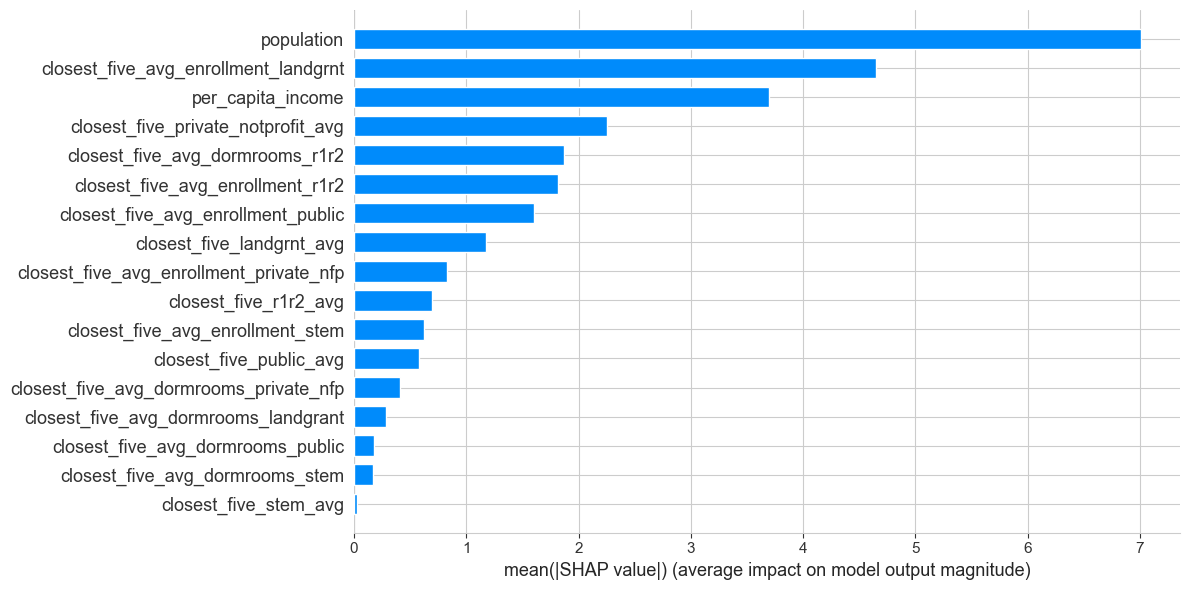

In [511]:
shap.summary_plot(
    shap_values, 
    X_train, 
    plot_type='bar', 
    show=False,
    plot_size=[12, 6]
)
plt.show()
plt.close()

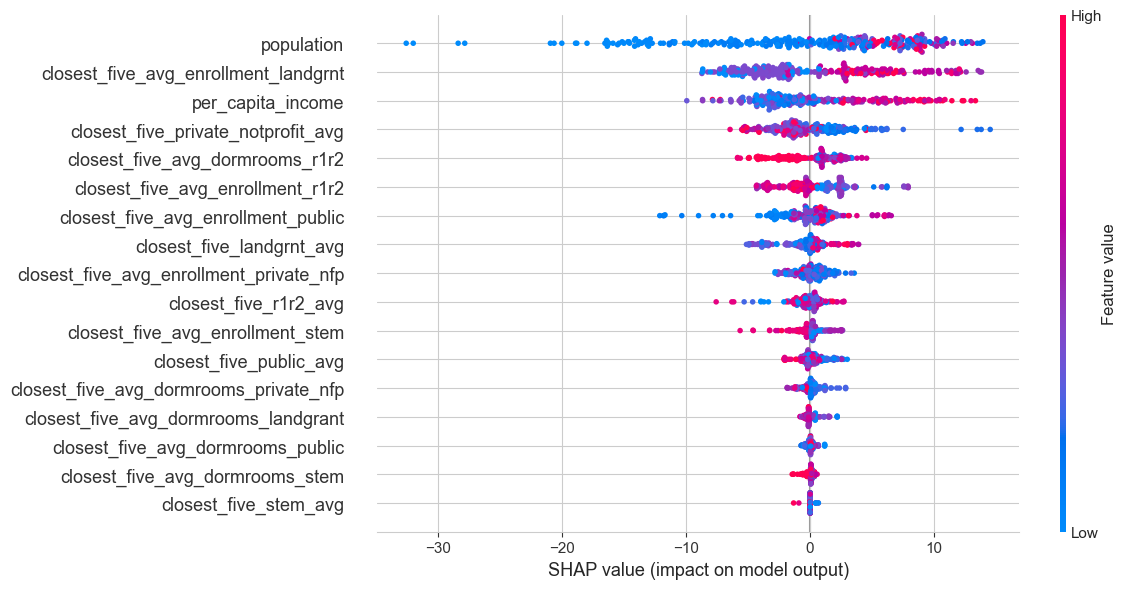

In [512]:
### the scatter plot
shap.summary_plot(shap_values, X_train, show=False, plot_size=[12, 6])
plt.show()
plt.close()

### Random Forest model

In [513]:
explainer = shap.TreeExplainer(random_forest)
shap_values = explainer.shap_values(X_train)

In [514]:

# Compute mean absolute SHAP value for each feature
shap_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(shap_values).mean(axis=0)
}).sort_values(by='Importance', ascending=False)

print("Feature Importance from SHAP:\n")
print(shap_importance)

Feature Importance from SHAP:

                                    Feature  Importance
0                                population    5.428268
1                         per_capita_income    3.545369
10     closest_five_avg_enrollment_landgrnt    2.582400
4        closest_five_private_notprofit_avg    2.086030
12          closest_five_avg_dormrooms_r1r2    2.052373
3                   closest_five_public_avg    1.963382
5                 closest_five_landgrnt_avg    1.412570
8        closest_five_avg_enrollment_public    1.135664
9   closest_five_avg_enrollment_private_nfp    0.781606
7          closest_five_avg_enrollment_r1r2    0.632657
2                     closest_five_r1r2_avg    0.560337
6                     closest_five_stem_avg    0.392559
14   closest_five_avg_dormrooms_private_nfp    0.353991
11         closest_five_avg_enrollment_stem    0.276622
16          closest_five_avg_dormrooms_stem    0.223080
13        closest_five_avg_dormrooms_public    0.214086
15     closest_fi

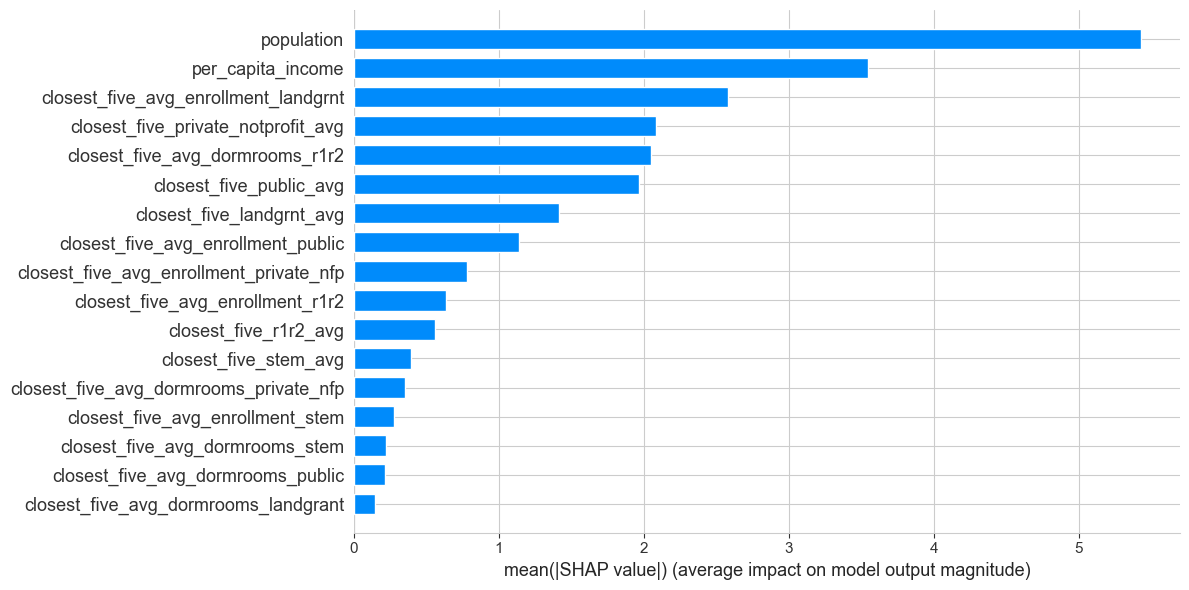

In [530]:
fig = plt.figure()
shap.summary_plot(
    shap_values, 
    X_train, 
    plot_type='bar', 
    show=False,
    plot_size=[12, 6]
)
with open('../data/NC_pickled/shap_random_forest_bar_plot.pkl', 'wb') as f:
    pickle.dump(fig, f)
plt.savefig('shap_random_forest_bar_plot.png')
plt.show(fig)
plt.close()

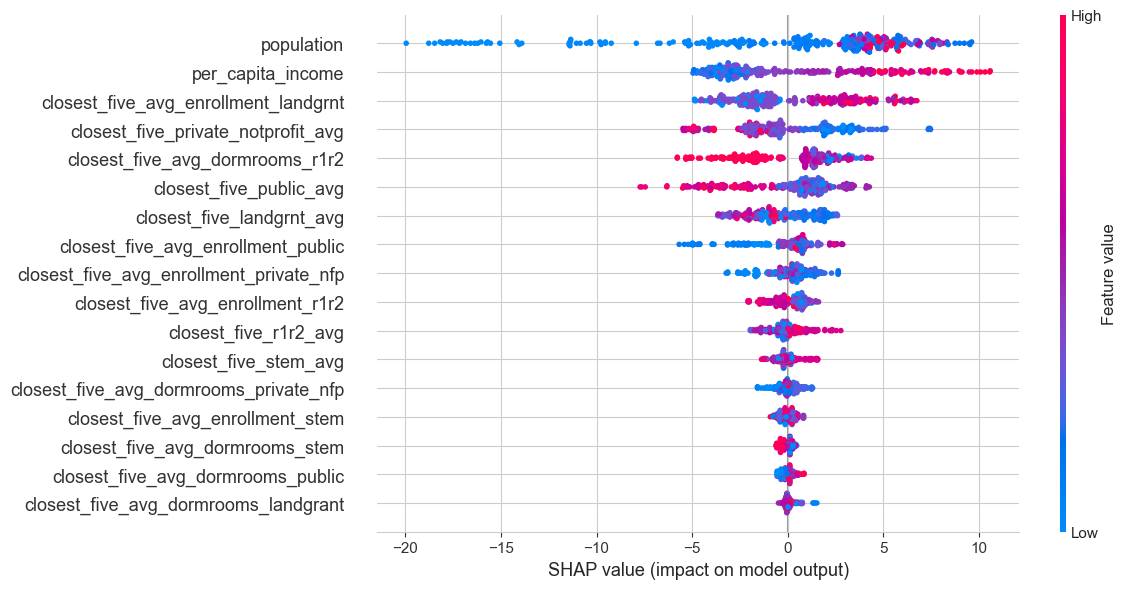

In [529]:

### the scatter plot
fig = plt.figure()
shap.summary_plot(shap_values, X_train, show=False, plot_size=[12, 6])
with open('../data/NC_pickled/shap_random_forest_scatter_plot.pkl', 'wb') as f:
    pickle.dump(fig, f)
plt.savefig('shap_random_forest_scatter_plot.png')    
plt.show(fig)
plt.close()

### population and per capita income are the two most important features

### Random Forest model to make predictions on the testing data

In [518]:
testing = pd.read_csv('../data/North_Carolina/train_test_split/testing.csv')

In [519]:
preds=random_forest.predict(testing[features])


In [520]:
predictions = testing[['County','Year','PERCENT_3_OR_ABOVE']]
predictions['Predicted pass rate'] = preds


C:\Users\amahapatra\AppData\Local\Temp\ipykernel_39736\946908726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['Predicted pass rate'] = preds


In [521]:
predictions

,County,Year,PERCENT_3_OR_ABOVE,Predicted pass rate
0,Hertford,2022,NaN,5.604844
1,Mcdowell,2020,43.835616438,36.851255
2,Carteret,2022,83.333333333,61.946758
3,Beaufort,2021,15.131578947,48.299952
4,Cherokee,2019,32.3529412,42.157894
...,...,...,...,...
91,Polk,2018,66.6666667,54.302944
92,Caswell,2018,28.4090909,29.621878
93,Buncombe,2018,55,54.226111
94,Greene,2019,22.2222222,34.152521


In [523]:
# Replace NaN values with zero
predictions = predictions.fillna(0)
# Replace '*' with zero in the entire DataFrame
predictions = predictions.replace('*', 0)

In [524]:
root_mean_squared_error(predictions['Predicted pass rate'],predictions['PERCENT_3_OR_ABOVE']) # Root mean squared error of our predictions.


np.float64(13.82109109631747)

In [525]:
r2_score(predictions['Predicted pass rate'],predictions['PERCENT_3_OR_ABOVE']) # R-squared coefficient of our predictions.


0.13394902128402664

<Figure size 640x480 with 0 Axes>

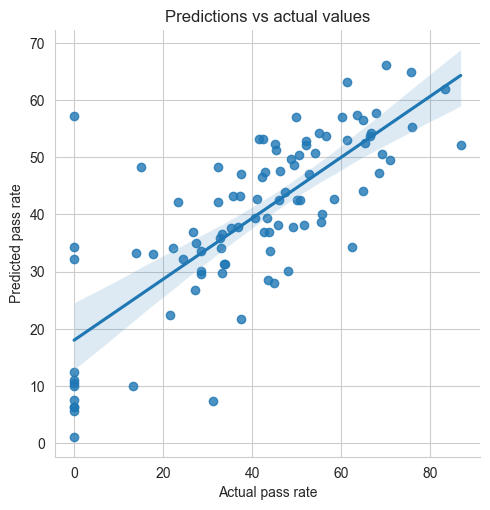

In [527]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'predictions' is your DataFrame
# Convert columns to numeric
predictions['PERCENT_3_OR_ABOVE'] = pd.to_numeric(predictions['PERCENT_3_OR_ABOVE'], errors='coerce')
predictions['Predicted pass rate'] = pd.to_numeric(predictions['Predicted pass rate'], errors='coerce')

# Drop rows with NaN values
predictions = predictions.dropna(subset=['PERCENT_3_OR_ABOVE', 'Predicted pass rate'])

# Generate the lmplot
plt.figure()
sns.lmplot(data=predictions, x='PERCENT_3_OR_ABOVE', y='Predicted pass rate')
plt.xlabel('Actual pass rate')
plt.title('Predictions vs actual values')
plt.savefig('Testing_prediction_vs_actual.png')
plt.show()